# Compare length records
So far I used the *Leclercq* length records, but Fabi thinks the *glamos.ch* data is better curated. Let's see if there is even a difference...

In [1]:
# import standard libs
import numpy as np
import pandas as pd

# import my libs
import sys
sys.path.append('../code/')
import utils

In [2]:
# read file
path = '../raw_data/length_data/glamos_length_change.csv'
date_parser = lambda d: pd.datetime.strptime(d, '%Y-%m-%d')
glamos_data = pd.read_csv(path, skiprows=5, header=[0,1,2], sep=';', parse_dates=[2,4], date_parser=date_parser)
glamos_data.head()

,glacier name,glacier id,start date of observation,quality of start date,end date of observation,quality of end date,length change,elevation of glacier tongue,observer
,Unnamed: 0_level_1,(according to Swiss Glacier Inventory),date_start,x = date not exactly known,date_end,x = date not exactly known,dL,h_min,Unnamed: 8_level_1
,Unnamed: 0_level_2,Unnamed: 1_level_2,yyyy-mm-dd (ISO 8601),Unnamed: 3_level_2,yyyy-mm-dd (ISO 8601),Unnamed: 5_level_2,m,m asl.,Unnamed: 8_level_2
0,Silvrettagletscher,A10g/05,1956-09-01,x,1957-09-01,x,-8.0,None,-
1,Silvrettagletscher,A10g/05,1957-09-01,x,1958-09-01,x,-9.0,None,-
2,Silvrettagletscher,A10g/05,1958-09-01,x,1959-09-01,x,-16.0,None,-
3,Silvrettagletscher,A10g/05,1959-09-01,x,1960-09-01,x,-3.0,None,-
4,Silvrettagletscher,A10g/05,1960-09-01,x,1961-09-01,x,-10.0,None,-


In [3]:
# drop column names
glamos_data.columns = glamos_data.columns.droplevel([1,2])
glamos_data.head()

,glacier name,glacier id,start date of observation,quality of start date,end date of observation,quality of end date,length change,elevation of glacier tongue,observer
0,Silvrettagletscher,A10g/05,1956-09-01,x,1957-09-01,x,-8.0,None,-
1,Silvrettagletscher,A10g/05,1957-09-01,x,1958-09-01,x,-9.0,None,-
2,Silvrettagletscher,A10g/05,1958-09-01,x,1959-09-01,x,-16.0,None,-
3,Silvrettagletscher,A10g/05,1959-09-01,x,1960-09-01,x,-3.0,None,-
4,Silvrettagletscher,A10g/05,1960-09-01,x,1961-09-01,x,-10.0,None,-


In [4]:
# select the Upper Grindelwald Glacier
grindel_glamos = (glamos_data[glamos_data['glacier name'] == 'Oberer Grindelwaldgletscher']).copy()
grindel_glamos.head()

,glacier name,glacier id,start date of observation,quality of start date,end date of observation,quality of end date,length change,elevation of glacier tongue,observer
3182,Oberer Grindelwaldgletscher,A54l/04,1879-09-01,x,1880-09-01,x,-1.0,None,-
3183,Oberer Grindelwaldgletscher,A54l/04,1880-09-01,x,1881-09-01,x,30.0,None,-
3184,Oberer Grindelwaldgletscher,A54l/04,1893-09-01,x,1894-09-01,x,51.0,None,-
3185,Oberer Grindelwaldgletscher,A54l/04,1894-09-01,x,1895-09-01,x,10.0,None,-
3186,Oberer Grindelwaldgletscher,A54l/04,1895-09-01,x,1896-09-01,x,-3.0,None,-


In [5]:
# get columns of interest
length_glamos = (grindel_glamos[['end date of observation','length change']]).copy()
length_glamos.columns = ['years', 'glamos']
# add years as index
length_glamos.index = length_glamos.years.dt.strftime('%Y').astype('int64')
length_glamos.drop('years', axis=1, inplace=True)
# compute cumulated length change
length_glamos = length_glamos.cumsum()
length_glamos.head()

,glamos
years,
1880,-1.0
1881,29.0
1894,80.0
1895,90.0
1896,87.0


In [6]:
# get leclercq length records
length_lec = utils.get_leclercq_length('11.01270', column='leclercq')
length_lec.head()

,leclercq
years,
1593,820
1600,820
1620,820
1640,570
1679,120


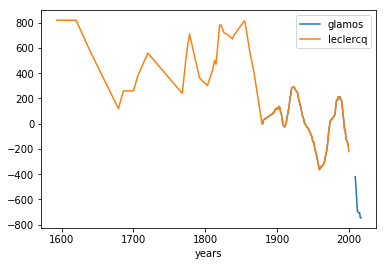

In [7]:
# combine both datasets
length = pd.concat([length_glamos, length_lec], axis=1)
length.plot()

In [8]:
# compute differences
length.dropna().glamos.equals(length.dropna().leclercq)

True

In [10]:
# store to file
fn = '/Users/oberrauch/work/grindelwald/data/length_ref_glamos.csv'
length_glamos.to_csv(fn)